https://colab.research.google.com/drive/1Z3V1FpkmXZyFUXjff1qvvRFTlMZNsFrd

In [1]:
!wget http://www.openslr.org/resources/12/train-clean-100.tar.gz

--2019-10-03 03:16:37--  http://www.openslr.org/resources/12/train-clean-100.tar.gz
Resolving www.openslr.org (www.openslr.org)... 46.101.158.64
Connecting to www.openslr.org (www.openslr.org)|46.101.158.64|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6387309499 (5.9G) [application/x-gzip]
Saving to: ‘train-clean-100.tar.gz’

train-clean-100.tar 100%[===================>]   5.95G   148MB/s    in 49s     

2019-10-03 03:17:26 (125 MB/s) - ‘train-clean-100.tar.gz’ saved [6387309499/6387309499]



In [2]:
!ls

sample_data  train-clean-100.tar.gz


In [0]:
!tar xzvf train-clean-100.tar.gz

In [0]:
import librosa

In [0]:
import os, numpy as np
org_path = '/content/LibriSpeech/train-clean-100/'
count = 0
inp = []
k=0
audio_name = []
audio_trans = []
for dir1 in os.listdir(org_path):
  dir2_path = org_path+dir1+'/'
  #print(dir2_path)
  for dir2 in os.listdir(dir2_path):
    dir3_path = dir2_path+dir2+'/'
    
    for audio in os.listdir(dir3_path):
      if audio.endswith('.txt'):
        k+=1
        file_path = dir3_path + audio
        with open(file_path) as f:
          line = f.readlines()
          for lines in line:
            audio_name.append(dir3_path+lines.split()[0]+'.flac')
            words2 = lines.split()[1:]
            words4=' '.join(words2)
            audio_trans.append(words4)

In [7]:
len(audio_name)

28539

In [0]:
import re
len_audio_name=[]
for i in range(len(audio_name)):
  tt = re.sub(' ','-',audio_trans[i])
  len_audio_name.append(len(tt))

In [9]:
max(len_audio_name)

398

(array([8.590e+02, 1.692e+03, 1.913e+03, 3.588e+03, 7.855e+03, 8.685e+03,
        3.443e+03, 4.790e+02, 2.300e+01, 2.000e+00]),
 array([  8.,  47.,  86., 125., 164., 203., 242., 281., 320., 359., 398.]),
 <a list of 10 Patch objects>)

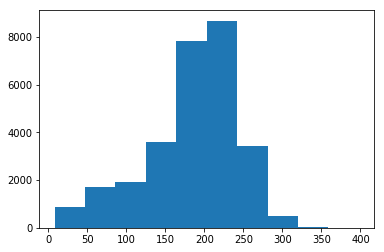

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(len_audio_name)

In [0]:
final_audio_name = []
final_audio_trans = []
for i in range(len(audio_name)):
  if(len_audio_name[i]<100):
    final_audio_name.append(audio_name[i])
    final_audio_trans.append(audio_trans[i])

In [12]:
inp = []
inp2 = []
op = []
op2 = []
count = 0
for j in range(len(final_audio_name)):
  t = librosa.core.load(final_audio_name[j],sr=16000, mono= True)
  
  if(t[0].shape[0]<160000):
    count+=1
    t = np.array(t[0])
    t2 = np.zeros(160000)
    t2[:len(t)] = t
    inp = []
    for i in range(t2.shape[0]//160 - 1):
      k = t2[(i*160):((i*160)+320)]
      fft = np.fft.rfft(k)
      inp.append(np.abs(fft))
    inp2.append(inp)
    op2.append(final_audio_trans[j])
    if(j%50==0):
      print(j, count)

0 1
100 76
150 126
200 176
250 226
300 275
350 325
400 375
450 425
500 475
550 525
600 575
650 623
700 673
750 723
800 773
850 823
900 873
950 923
1000 973
1050 1023
1100 1073
1150 1123
1200 1173
1250 1223
1350 1322
1400 1372
1450 1422
1500 1472
1550 1522
1600 1572
1650 1622
1700 1672
1750 1722
1800 1771
1850 1821
1900 1871
1950 1921
2000 1971
2050 2020
2100 2070
2150 2120
2200 2168
2250 2218
2300 2267
2350 2317
2400 2367
2450 2417
2500 2467
2550 2517
2600 2566
2650 2616
2700 2666
2750 2716
2800 2766
2850 2816
2900 2866
2950 2915
3000 2962
3050 3012
3100 3061
3150 3111


In [13]:
j

3193

In [0]:
import itertools
list2d = op2
charList = list(set(list(itertools.chain(*list2d))))

In [15]:
len(charList)

28

In [16]:
num_audio = len(op2)
num_audio

3153

In [0]:
import numpy as np
y2 = []
input_lengths = np.ones((num_audio,1))*243
label_lengths = np.zeros((num_audio,1))
for i in range(num_audio):
    val = list(map(lambda x: charList.index(x), op2[i]))
    while len(val)<243:
        val.append(29)
    y2.append(val)
    label_lengths[i] = len(op2[i])
    #input_lengths[i] = len(val)
    input_lengths[i] = 243

In [18]:
np.max(label_lengths)

99.0

In [19]:
np.min(label_lengths)

8.0

In [20]:
np.percentile(label_lengths, 25)

45.0

In [21]:
inp2[1][0].shape

(161,)

In [0]:
import numpy as np
x = np.asarray(inp2)
y2 = np.asarray(y2)

In [0]:
import numpy as np
outputs = {'ctc': np.zeros([32])}

In [24]:
import keras.backend as K
def ctc_loss(args):
    y_pred, labels, input_length, label_length = args
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

Using TensorFlow backend.


In [25]:
audio_trans[0]

"THE EVENING PASSED ON MADAME DE VILLEFORT EXPRESSED A DESIRE TO RETURN TO PARIS WHICH MADAME DANGLARS HAD NOT DARED TO DO NOTWITHSTANDING THE UNEASINESS SHE EXPERIENCED ON HIS WIFE'S REQUEST M DE VILLEFORT"

In [0]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical,np_utils
from keras.layers import Dense, Input, GlobalMaxPooling1D,Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Convolution2D, MaxPooling2D,Conv2D, Reshape, GRU, TimeDistributed, Lambda
from keras.models import Model
import random
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM , Bidirectional,Dropout, BatchNormalization
from keras import backend as K
from keras.layers.advanced_activations import LeakyReLU
from keras import regularizers
from keras.layers.merge import add, concatenate

In [27]:
input_data = Input(name='the_input', shape = (999,161), dtype='float32')
inp = BatchNormalization(name="inp")(input_data)
conv= Conv1D(filters=220, kernel_size = 11,strides = 2, padding='valid',activation='relu')(inp)
conv = BatchNormalization(name="Normal0")(conv)

In [0]:
conv1= Conv1D(filters=220, kernel_size = 11,strides = 2, padding='valid',activation='relu')(conv)
conv1 = BatchNormalization(name="Normal_0")(conv1)

In [29]:
gru_3 = GRU(512, return_sequences = True, name = 'gru_3')(conv1)
gru_4 = GRU(512, return_sequences = True, go_backwards = True, name = 'gru_4')(conv1)

merged = concatenate([gru_3, gru_4])
normalized = BatchNormalization(name="Normal")(merged)
dense = TimeDistributed(Dense(30))(normalized)
y_pred = TimeDistributed(Activation('softmax', name='softmax'))(dense)

Model(inputs = input_data, outputs = y_pred).summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input (InputLayer)          (None, 999, 161)     0                                            
__________________________________________________________________________________________________
inp (BatchNormalization)        (None, 999, 161)     644         the_input[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 495, 220)     389840      inp[0][0]                        
__________________________________________________________________________________________________
Normal0 (BatchNormalization)    (None, 495, 220)     880         conv1d_1[0][0]                   
____________________________________________________________________________________________

In [30]:
from keras.optimizers import Adam
Optimizer = Adam(lr = 0.001)
labels = Input(name = 'the_labels', shape=[243], dtype='float32')
input_length = Input(name='input_length', shape=[1],dtype='int64')
label_length = Input(name='label_length',shape=[1],dtype='int64')
output = Lambda(ctc_loss, output_shape=(1,),name='ctc')([y_pred, labels, input_length, label_length])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [0]:
model = Model(inputs = [input_data, labels, input_length, label_length], outputs= output)

In [32]:
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer = Optimizer, metrics = ['accuracy'])

In [0]:
for i in range(5000):
  samp=random.sample(range(len(inp2)-25),32)
  x3=[inp2[i] for i in samp]
  x3 = np.array(x3)/100
  #x3 = x3/np.max(x3)
  y3 = [y2[i] for i in samp]
  y3 = np.array(y3)
  input_lengths2 = [input_lengths[i] for i in samp]
  label_lengths2 = [label_lengths[i] for i in samp]
  input_lengths2 = np.array(input_lengths2)
  label_lengths2 = np.array(label_lengths2)
  inputs = {
    'the_input': x3,
    'the_labels': y3,
    'input_length': input_lengths2,
    'label_length': label_lengths2,
  }
  outputs = {'ctc': np.zeros([32])}  
  if(i%100==0):
    print(i)
    model.fit(inputs, outputs,batch_size = 32, epochs=3, verbose =1)
    
  else:
    model.fit(inputs, outputs,batch_size = 32, epochs=3, verbose =0)

In [0]:
model2 = Model(inputs = input_data, outputs = y_pred)

In [0]:
k=-12
pred= model2.predict(np.array(inp2[k]).reshape(1,999,161)/100)

In [0]:
pred[0,:].shape, np.array(y2[k]).shape

((243, 30), (243,))

In [0]:
np.argmax(pred[0,:],axis=1)

array([29, 29, 29, 29, 29, 29, 29, 11, 14, 29,  0, 18, 18, 26, 26,  2,  2,
        0,  0,  4,  7,  7, 29, 29, 29, 29, 29, 29, 18, 18, 12, 13, 29,  0,
        0, 11, 26, 18, 27, 13, 29, 29, 29, 29, 18, 18, 24, 26, 14,  8,  8,
       10, 10, 10, 29, 29, 29, 29, 29, 29, 29, 29, 18, 18, 18, 26, 29,  0,
        0,  0,  0, 11,  4, 18, 27, 26,  5, 20, 29, 18, 25, 25,  4,  1,  1,
        1, 24,  8,  8,  2, 29, 18, 18, 23, 23, 26,  5, 29,  8,  8, 29,  8,
        8,  8,  8,  1,  1,  1, 29, 29, 29, 29, 29, 29, 18, 18, 18,  1, 18,
       18,  1,  1, 26, 29, 18, 10, 26, 26, 29,  2,  2, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29

In [0]:
y3[k][:10]

array([ 4, 27, 15, 10,  3, 27, 16,  4, 27,  1])

In [0]:
def decoder(pred):
  pred_ints = (K.eval(K.ctc_decode(pred,[243])[0][0])).flatten().tolist()
  #print(pred_ints)
  out = ""
  for i in range(len(pred_ints)):
    if pred_ints[i]<28:
      out = out+charList[pred_ints[i]]
      
  print(out)

In [0]:
decoder(pred)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
HAT ONTED BYTHO MY POARL OTHE MOUG WESPRN FOURRS S SO LON


In [0]:
out = ""
for i in range(len(y2[k])):
  try:
    #print(y2[k][i])
    out += charList[y2[k][i]]
  except:
    continue
  
print(out)

I FOUND IT BY THE NINTH PARALLEL OFF THE NORTHWESTERN SHORES OF CEYLON
